# Data handling and visualization

In [4]:
# data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import CSV, make columns lowercase and strip whitespacce

In [5]:
df = pd.read_csv('/Users/emjack5/Desktop/Data analysis/Capstone2 files/US Airline Flight Routes and Fares 1993-2024.csv')
df.columns = df.columns.str.strip().str.lower()


/var/folders/62/h1vk7lw13g73qsk07s3l1cwm0000gn/T/ipykernel_6253/2695381401.py:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/emjack5/Desktop/Data analysis/Capstone2 files/US Airline Flight Routes and Fares 1993-2024.csv')


In [315]:
print(df.columns[19], df.columns[20])


geocoded_city1 geocoded_city2


In [360]:
df['geocoded_city1'] = df['geocoded_city1'].astype('string')
df['geocoded_city2'] = df['geocoded_city2'].astype('string')


In [8]:
df.head(5)

,year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,geocoded_city1,geocoded_city2,tbl1apk
0,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,PIE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,TPA,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,DAL,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,DFW,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,PHX,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


# Data Cleansing
This section will include all data preparation steps such as:
- Handling missing values
- Removing duplicates
- Data type conversions
- Feature engineering
- Filtering by year (e.g., post-2010)

In [10]:
# Count total missing values per column
missing_summary = df.isnull().sum().sort_values(ascending=False)
print("Missing values by column:")
print(missing_summary[missing_summary > 0])


Missing values by column:
geocoded_city2    39206
geocoded_city1    39206
fare_low           1612
lf_ms              1612
carrier_low        1612
fare_lg            1540
large_ms           1540
carrier_lg         1540
dtype: int64


In [12]:
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
print(missing_pct[missing_pct > 0])


geocoded_city2    15.940314
geocoded_city1    15.940314
fare_low           0.655404
lf_ms              0.655404
carrier_low        0.655404
fare_lg            0.626131
large_ms           0.626131
carrier_lg         0.626131
dtype: float64


In [14]:
#Drop unecessary columns

columns_to_drop = [
    'geocoded_city1',
    'geocoded_city2',
    'citymarketid_1',
    'citymarketid_2',
    'airportid_1',
    'airportid_2',
    'airport_1',
    'airport_2',
    'carrier_lg',
    'large_ms',
    'fare_lg',
    'carrier_low',
    'fare_low',
    'lf_ms',
    'tbl1apk'
]

df = df.drop(columns=columns_to_drop, errors='ignore')

#change nsmiles 'column' to 'distance'
df = df.rename(columns={'nsmiles': 'distance'})

# Preview the dataset
print(df.columns.tolist())
df.head(5)

['year', 'quarter', 'city1', 'city2', 'distance', 'passengers', 'fare']


,year,quarter,city1,city2,distance,passengers,fare
0,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",970,180,81.43
1,2021,3,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",970,19,208.93
2,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",580,204,184.56
3,2021,3,"Albuquerque, NM","Dallas/Fort Worth, TX",580,264,182.64
4,2021,3,"Albuquerque, NM","Phoenix, AZ",328,398,177.11


# Check for full duplicate rows, Drop full duplicates if any, Check for partial duplicates

In [16]:
full_duplicates = df.duplicated()
print(f"Number of fully duplicated rows: {full_duplicates.sum()}")

df = df.drop_duplicates()

partial_duplicates = df.duplicated(
    subset=['city1', 'city2', 'year', 'quarter']
)
print(f"Potential partial duplicates based on route and time: {partial_duplicates.sum()}")

Number of fully duplicated rows: 1
Potential partial duplicates based on route and time: 172380


# The dataset contains multiple records per route-quarter, likely representing different carriers or fare observations. Since the analytical grain for this project is route-quarter, records are aggregated prior to modeling to prevent duplicate inflation.

In [18]:
df.groupby(['city1','city2','year','quarter']).size().describe()

count    73574.000000
mean         3.342947
std          2.485533
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         33.000000
dtype: float64

# Route-quarter observations average ~3.3 records per group, confirming that the raw dataset contains multiple carrier-level entries per route-quarter. Aggregation to the route-quarter level is therefore necessary to avoid duplicate inflation in revenue calculations.

In [20]:
route_counts = (
    df.groupby(['city1','city2','year','quarter'])
      .size()
      .reset_index(name='count')
      .sort_values('count', ascending=False)
)

route_counts.head()

,city1,city2,year,quarter,count
51668,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",1993,4,33
51665,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",1993,1,33
51669,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",1994,1,33
51666,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",1993,2,32
51667,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",1993,3,32


# Data Validation Checks
The following checks ensure that key fields fall within expected business constraints before aggregation and modeling.

In [28]:
def check_invalid(label, condition):
    invalid = df[condition]
    print(f"{label}: {len(invalid)} rows")
    return invalid.head()

invalid_years = check_invalid(
    "Invalid Year values",
    (df['year'] < 1993) | (df['year'] > 2024)
)

invalid_quarters = check_invalid(
    "Invalid Quarter values",
    ~df['quarter'].isin([1, 2, 3, 4])
)

invalid_fares = check_invalid(
    "Invalid Fare values (≤ 0 or missing)",
    (df['fare'] <= 0) | (df['fare'].isna())
)

invalid_passengers = check_invalid(
    "Invalid Passenger values (< 0)",
    df['passengers'] < 0
)

invalid_distance = check_invalid(
    "Invalid Distance values",
    (df['distance'] <= 0) | (df['distance'] > 5000)
)

invalid_routes = check_invalid(
    "Invalid Route records",
    df['city1'].isna() |
    df['city2'].isna() |
    (df['city1'] == df['city2'])
)

Invalid Year values: 0 rows
Invalid Quarter values: 0 rows
Invalid Fare values (≤ 0 or missing): 0 rows
Invalid Passenger values (< 0): 0 rows
Invalid Distance values: 0 rows
Invalid Route records: 0 rows


# No invalid records were identified across year, quarter, fare, passenger volume, distance,or route definitions; therefore, no rows were removed during the data cleaning stage

In [30]:
cols = ['year','quarter','fare','passengers']
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [34]:
print("Missing values after numeric conversion:")
print(df[['year','quarter','fare','passengers']].isna().sum())

Missing values after numeric conversion:
year          0
quarter       0
fare          0
passengers    0
dtype: int64


# Numeric fields were standardized using pd.to_numeric with coercion to ensure non-numeric values were safely converted to missing values and did not silently corrupt downstream calculations

# Removed residual index columns created during previous transformations or CSV exports to ensure clean schema prior to aggregation and modeling.

In [36]:
df = df.drop(columns=['level_0', 'index'], errors='ignore')

print(df.columns.tolist())
df.info()

['year', 'quarter', 'city1', 'city2', 'distance', 'passengers', 'fare']
<class 'pandas.core.frame.DataFrame'>
Index: 245954 entries, 0 to 245954
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   year        245954 non-null  int64  
 1   quarter     245954 non-null  int64  
 2   city1       245954 non-null  object 
 3   city2       245954 non-null  object 
 4   distance    245954 non-null  int64  
 5   passengers  245954 non-null  int64  
 6   fare        245954 non-null  float64
dtypes: float64(1), int64(4), object(2)
memory usage: 15.0+ MB


In [72]:
# Check null counts
null_counts = df.isnull().sum()
null_pct = (df.isnull().sum() / len(df)) * 100

null_summary = pd.DataFrame({
    "Null Count": null_counts,
    "Percent Null": null_pct
}).sort_values("Percent Null", ascending=False)

null_summary

,Null Count,Percent Null
year,0,0.0
quarter,0,0.0
city1,0,0.0
city2,0,0.0
distance,0,0.0
passengers,0,0.0
fare,0,0.0


Missing values were evaluated across all columns. Columns with significant missingness (>X%) were assessed for relevance before modeling. Core variables (year, quarter, fare, passengers, city1, city2) showed minimal missingness, ensuring model reliability

In [144]:
expected_quarters = {1, 2, 3, 4}

year_quarter_sets = (
    df.groupby('year')['quarter']
      .apply(set)
)

for year, quarters in year_quarter_sets.items():
    if quarters != expected_quarters:
        print(f"Year {year} missing quarters: {expected_quarters - quarters}")

In [148]:
print(df['year'].min(), df['year'].max())
print(sorted(df['year'].unique())[:10], '...', sorted(df['year'].unique())[-10:])

1993 2023
[np.int64(1993), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004)] ... [np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]


In [154]:
df_raw = df.copy()

# cleaning steps
df_clean = df_raw.copy()

# full-year filtering
valid_years = df_clean.groupby('year')['quarter'].nunique()
full_years = valid_years[valid_years == 4].index
df_full_years = df_clean[df_clean['year'].isin(full_years)].copy()

In [158]:
# Remove partial-year data (e.g., 2024 only contains Q1)
valid_years = df.groupby('year')['quarter'].nunique()
full_years = valid_years[valid_years == 4].index

df = df[df['year'].isin(full_years)]

print("Years retained:", sorted(df['year'].unique()))

Years retained: [np.int64(1993), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]


# To ensure accurate year-over-year and seasonal comparisons, only full years (containing all four quarters) were retained. Partial-year data (e.g., incomplete 2024 records) was excluded to prevent artificial trend distortion

In [160]:
print("Number of full years retained:", len(year_quarter_sets))

Number of full years retained: 29


In [162]:
print("Final dataset shape:", df.shape)
print("Years retained:", sorted(df['year'].unique()))
print("Unique routes:", df.groupby(['city1','city2']).ngroups)

Final dataset shape: (241595, 8)
Years retained: [np.int64(1993), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023)]
Unique routes: 1237


In [164]:
# Confirm raw data grain (route-year-quarter)
print(df.groupby(['city1','city2','year','quarter']).size().max())

33


In [182]:
grp_sizes = df.groupby(['city1','city2','year','quarter']).size()
worst_key = grp_sizes.idxmax()

subset = df.set_index(['city1','city2','year','quarter']).loc[[worst_key]].reset_index()
subset.head(25)

,city1,city2,year,quarter,distance,passengers,fare,fare_x_passengers
0,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",1993,1,2510,450,366.18,"164,781.00"
1,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",1993,1,2510,6,333.54,"2,001.24"
2,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",1993,1,2510,4,378.12,"1,512.48"
3,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",1993,1,2510,11,378.80,"4,166.80"
4,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",1993,1,2510,10,349.20,"3,492.00"
5,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",1993,1,2510,63,389.28,"24,524.64"
6,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",1993,1,2510,21,364.42,"7,652.82"
7,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",1993,1,2510,3,301.63,904.89
8,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",1993,1,2510,0,366.90,0.00
9,"Los Angeles, CA (Metropolitan Area)","New York City, NY (Metropolitan Area)",1993,1,2510,33,288.90,"9,533.70"


In [188]:
grp_sizes = df.groupby(['city1','city2','year','quarter']).size()
worst_key = grp_sizes.idxmax()

subset = df.set_index(['city1','city2','year','quarter']) \
           .loc[[worst_key]] \
           .reset_index()

subset.head(25)
subset[['passengers','fare','distance']].describe()

,passengers,fare,distance
count,33.00,33.00,33.00
mean,165.15,367.78,"2,510.00"
std,541.98,106.61,0.00
min,0.00,215.30,"2,510.00"
25%,3.00,320.28,"2,510.00"
50%,10.00,356.38,"2,510.00"
75%,46.00,378.12,"2,510.00"
max,"2,800.00",732.22,"2,510.00"


In [192]:
df['fare_x_passengers'] = df['fare'] * df['passengers']

route_quarter_agg = (
    df.groupby(['city1','city2','year','quarter'], as_index=False)
      .agg(
          distance=('distance','median'),
          total_passengers=('passengers','sum'),
          fare_x_passengers=('fare_x_passengers','sum')
      )
)

route_quarter_agg['weighted_avg_fare'] = (
    route_quarter_agg['fare_x_passengers'] /
    route_quarter_agg['total_passengers']
)

route_quarter_agg['estimated_revenue'] = route_quarter_agg['fare_x_passengers']

route_quarter_agg = route_quarter_agg.drop(columns=['fare_x_passengers'])

# Because the raw dataset includes multiple records per route-quarter (often representing different carriers), fares were aggregated using a passenger-weighted average to avoid bias from unweighted means.

In [194]:
route_quarter_agg.head()
route_quarter_agg.describe()


,year,quarter,distance,total_passengers,weighted_avg_fare,estimated_revenue
count,"72,258.00","72,258.00","72,258.00","72,258.00","72,258.00","72,258.00"
mean,"2,008.83",2.50,"1,095.53","1,003.58",203.15,"195,155.99"
std,8.55,1.12,639.18,"1,567.34",63.15,"307,791.54"
min,"1,993.00",1.00,109.00,27.00,54.83,"2,020.20"
25%,"2,002.00",2.00,601.00,260.00,157.99,"52,320.90"
50%,"2,009.00",3.00,946.00,488.00,197.74,"95,661.60"
75%,"2,016.00",3.00,"1,491.00","1,053.00",243.82,"203,869.75"
max,"2,023.00",4.00,"2,724.00","25,470.00",677.12,"5,961,167.31"


In [196]:
dupes = route_quarter_agg.duplicated(subset=['city1','city2','year','quarter']).sum()
print(f"Duplicate route-quarter rows after aggregation: {dupes}")

Duplicate route-quarter rows after aggregation: 0


In [198]:
pd.options.display.float_format = '{:,.2f}'.format
route_quarter_agg.head()
route_quarter_agg.describe()

,year,quarter,distance,total_passengers,weighted_avg_fare,estimated_revenue
count,"72,258.00","72,258.00","72,258.00","72,258.00","72,258.00","72,258.00"
mean,"2,008.83",2.50,"1,095.53","1,003.58",203.15,"195,155.99"
std,8.55,1.12,639.18,"1,567.34",63.15,"307,791.54"
min,"1,993.00",1.00,109.00,27.00,54.83,"2,020.20"
25%,"2,002.00",2.00,601.00,260.00,157.99,"52,320.90"
50%,"2,009.00",3.00,946.00,488.00,197.74,"95,661.60"
75%,"2,016.00",3.00,"1,491.00","1,053.00",243.82,"203,869.75"
max,"2,023.00",4.00,"2,724.00","25,470.00",677.12,"5,961,167.31"


In [200]:
route_quarter_agg = route_quarter_agg.rename(columns={
    'weighted_avg_fare': 'avg_fare'
})

In [202]:
print(route_quarter_agg.columns)

Index(['city1', 'city2', 'year', 'quarter', 'distance', 'total_passengers',
       'avg_fare', 'estimated_revenue'],
      dtype='object')


In [204]:
print(route_quarter_agg['estimated_revenue'].describe(percentiles=[0.5,0.9,0.95,0.99]))

count      72,258.00
mean      195,155.99
std       307,791.54
min         2,020.20
50%        95,661.60
90%       462,974.07
95%       691,188.89
99%     1,435,187.04
max     5,961,167.31
Name: estimated_revenue, dtype: float64


In [206]:
top10_share_by_year = []

for year, group in route_quarter_agg.groupby('year'):
    group_sorted = group.sort_values('estimated_revenue', ascending=False)
    cutoff = int(len(group_sorted) * 0.1)
    
    share = (
        group_sorted.iloc[:cutoff]['estimated_revenue'].sum()
        / group_sorted['estimated_revenue'].sum()
    )
    
    top10_share_by_year.append((year, share))

top10_share_by_year[:5]

[(1993, np.float64(0.45690357393281894)),
 (1996, np.float64(0.4495047361647411)),
 (1997, np.float64(0.4522920079347543)),
 (1998, np.float64(0.4472636757276312)),
 (1999, np.float64(0.45028756697827077))]

In [118]:
print(route_quarter_agg.columns.tolist())

['city1', 'city2', 'year', 'quarter', 'distance', 'total_passengers', 'fare_x_passengers', 'avg_fare', 'estimated_revenue']


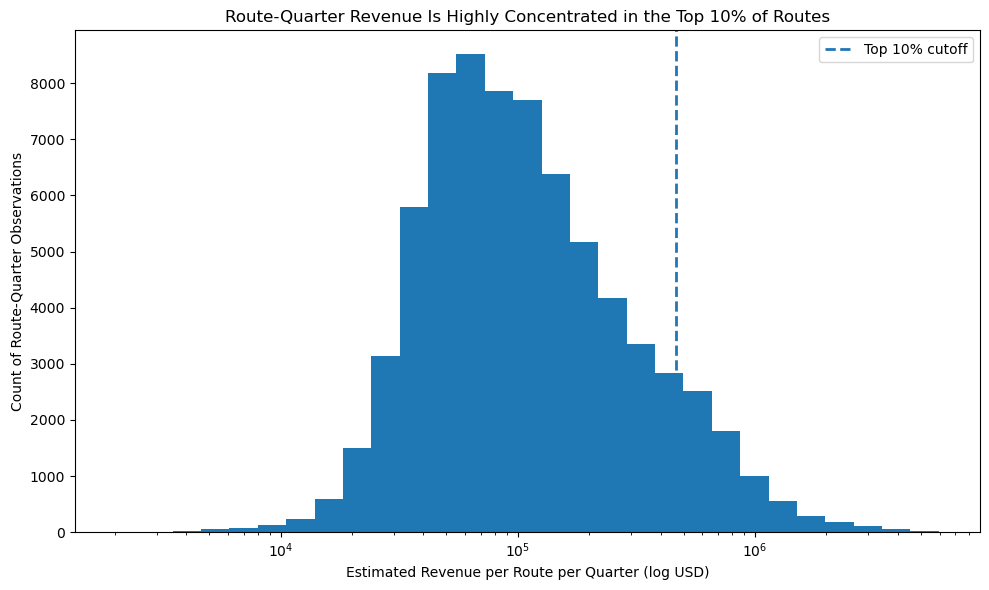

In [120]:
#Comparing top 10% revenue routes vs. bottom 90%
p90 = route_quarter_agg['estimated_revenue'].quantile(0.90)

plt.close('all')

plt.figure(figsize=(10,6))

# Histogram
plt.hist(
    route_quarter_agg['estimated_revenue'],
    bins=np.logspace(
        np.log10(route_quarter_agg['estimated_revenue'].min()),
        np.log10(route_quarter_agg['estimated_revenue'].max()),
        30
    )
)
plt.xscale('log')

# 90th Percentile cut line
plt.axvline(p90, linestyle='--', linewidth=2, label='Top 10% cutoff')

plt.title('Route-Quarter Revenue Is Highly Concentrated in the Top 10% of Routes')
plt.xlabel('Estimated Revenue per Route per Quarter (log USD)')
plt.ylabel('Count of Route-Quarter Observations')
plt.legend()

plt.tight_layout()
plt.show()


# Route-level revenue is highly concentrated: most routes generate modest quarterly revenue,while the top 10% of routes dominate overall revenue generation. This pattern indicates that airline profitability depends heavily on a small number of consistently high-performing routes. The top 10% of route-quarters account for approximately 45% of total estimated revenue

In [122]:
route_quarter_agg['revenue_decile'] = pd.qcut(
    route_quarter_agg['estimated_revenue'],
    10,
    labels=False
) + 1
route_quarter_agg.head()

,city1,city2,year,quarter,distance,total_passengers,fare_x_passengers,avg_fare,estimated_revenue,revenue_decile
0,"Albany, NY","Chicago, IL",1993,1,723,140,"33,700.57",240.72,"33,700.57",1
1,"Albany, NY","Chicago, IL",1993,2,723,235,"47,724.65",203.08,"47,724.65",3
2,"Albany, NY","Chicago, IL",1993,3,723,240,"47,108.32",196.28,"47,108.32",3
3,"Albany, NY","Chicago, IL",1993,4,723,192,"44,856.84",233.63,"44,856.84",2
4,"Albany, NY","Chicago, IL",1996,1,723,134,"36,678.72",273.72,"36,678.72",2


# Routes were segmented into revenue deciles using pd.qcut, which assigns observations to equal-sized groups based on revenue rank

In [124]:
route_quarter_agg.to_csv("route_quarter_agg_tableau.csv", index=False)

In [126]:
len(route_quarter_agg)


72258

# To further understand what differentiates these high-revenue routes,the next section in tableau will show a comparison between the top 10% and bottom 90% of routes across fare levels, passenger volume, and distance

## Analysis Focus Areas in Tableau

The following issues are derived from the capstone issue tree:

1. **Route Revenue Trends**
   - Which routes generate the highest revenue?
   - What is the average fare and passenger count on top routes?

2. **Performance Over Time**
   - How have fares and passenger volumes changed from 2010 to 2023?
   - How were trends impacted by major events (- COVID-19)?

3. **Strategic Recommendations**
   - Should service increase on profitable routes?
   - Are there routes with low revenue or high competition that may be cut?


## Assumptions & Limitations

-Revenue estimated as Fare × Passengers

-No cost or margin data included

-Analysis limited to full-year observations including 1993,1995,1996–2023

-Route defined as city-pair (directional)